***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df_feat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [9]:
X = df_feat
Y = df_target
x = X.values
y = Y.values

In [10]:
#Train test split and scaling
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [11]:
#Train the support vector classifier
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_pred

/home/klarakhalo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [12]:
#Predictions and evaluations
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.989010989010989
0.9824561403508771


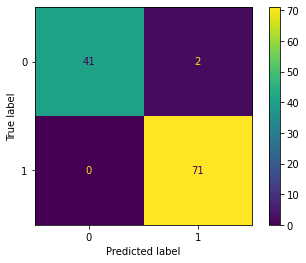

In [13]:
con_clf = confusion_matrix(Y_test, Y_pred)
con_clf
disp = ConfusionMatrixDisplay(con_clf)
disp.plot()

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [14]:
#Set parameters
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': list(range(1, 10)),
        'max_iter': [-1],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced', None]}

In [15]:
svc = SVC()
clf_checker = GridSearchCV(svc, parameters, refit=True)

In [ ]:
clf_checker.fit(X_train, Y_train)

In [17]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.)
sorted(clf_checker.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_class_weight',
 'param_degree',
 'param_gamma',
 'param_kernel',
 'param_max_iter',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [18]:
cv_results_df = pd.DataFrame(clf_checker.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004405,0.001461,0.000665,0.000141,balanced,1,scale,linear,-1,"{'class_weight': 'balanced', 'degree': 1, 'gam...",0.967033,0.967033,1.000000,0.989011,0.945055,0.973626,0.019160,32
1,0.002480,0.000301,0.000590,0.000056,balanced,1,scale,poly,-1,"{'class_weight': 'balanced', 'degree': 1, 'gam...",0.978022,0.967033,0.989011,0.978022,0.967033,0.975824,0.008223,19
2,0.003243,0.000176,0.000766,0.000078,balanced,1,scale,rbf,-1,"{'class_weight': 'balanced', 'degree': 1, 'gam...",0.978022,0.956044,1.000000,0.989011,0.967033,0.978022,0.015541,10
3,0.003576,0.000093,0.000788,0.000086,balanced,1,scale,sigmoid,-1,"{'class_weight': 'balanced', 'degree': 1, 'gam...",0.956044,0.945055,0.945055,0.967033,0.901099,0.942857,0.022413,104
4,0.002594,0.000279,0.000417,0.000028,balanced,1,auto,linear,-1,"{'class_weight': 'balanced', 'degree': 1, 'gam...",0.967033,0.967033,1.000000,0.989011,0.945055,0.973626,0.019160,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.003184,0.000069,0.000721,0.000045,None,9,scale,sigmoid,-1,"{'class_weight': None, 'degree': 9, 'gamma': '...",0.978022,0.956044,0.967033,0.956044,0.945055,0.960440,0.011207,77
140,0.002345,0.000198,0.000420,0.000027,None,9,auto,linear,-1,"{'class_weight': None, 'degree': 9, 'gamma': '...",0.978022,0.967033,0.989011,0.967033,0.945055,0.969231,0.014579,59
141,0.003906,0.000055,0.001016,0.000064,None,9,auto,poly,-1,"{'class_weight': None, 'degree': 9, 'gamma': '...",0.802198,0.747253,0.813187,0.747253,0.769231,0.775824,0.027451,140
142,0.002868,0.000083,0.000684,0.000020,None,9,auto,rbf,-1,"{'class_weight': None, 'degree': 9, 'gamma': '...",0.978022,0.967033,0.989011,0.989011,0.934066,0.971429,0.020382,50


In [19]:
best_parameters = clf_checker.best_params_
best_parameters

{'class_weight': 'balanced',
 'degree': 1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1}

In [20]:
best_score = clf_checker.best_score_
best_score

0.9802197802197803

In [21]:
clf_best = SVC(class_weight='balanced', degree=1, gamma='auto', kernel='rbf', max_iter=-1)
clf_best.fit(X_train, Y_train)
Y_pred_best = clf_best.predict(X_test)
Y_pred_best

/home/klarakhalo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [22]:
print(clf_best.score(X_train, Y_train))
print(clf_best.score(X_test, Y_test))

0.9846153846153847
0.9824561403508771


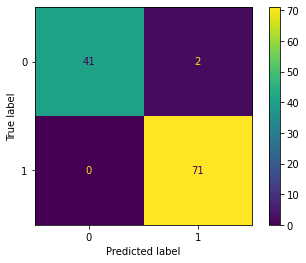

In [23]:
# print the confusion matrix
con_best = confusion_matrix(Y_test, Y_pred_best)
con_best
disp_best = ConfusionMatrixDisplay(con_best)
disp_best.plot()

# Discussion of results

Using GridSearchCV, we can find the best parameters for using Support Vector Classification on this dataset are:
- class_weight='balanced', degree=1, gamma='auto', kernel='rbf', max_iter=-1

However, the scores compared to using the default parameters are the same.